In [1]:
import yfinance as yf
import pandas as pd

# Create Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract max historical data and reset index
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Display first 5 rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [3]:
# Try using the magic command without the exclamation point
%pip install requests beautifulsoup4 yfinance pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Parse HTML and extract table
soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all("tbody")[1]  # Quarterly revenue table

# Create DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text
        revenue = cols[1].text.replace(',', '').replace('$', '')
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Clean data
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [5]:
# Repeat Question 1 for GameStop (GME)
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
print(gamestop_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
# Repeat Question 2 for GameStop revenue
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all("tbody")[1]  # GameStop revenue table

gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text
        revenue = cols[1].text.replace(',', '').replace('$', '')
        gamestop_revenue = pd.concat([gamestop_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

gamestop_revenue = gamestop_revenue[gamestop_revenue["Revenue"] != ""]
print(gamestop_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


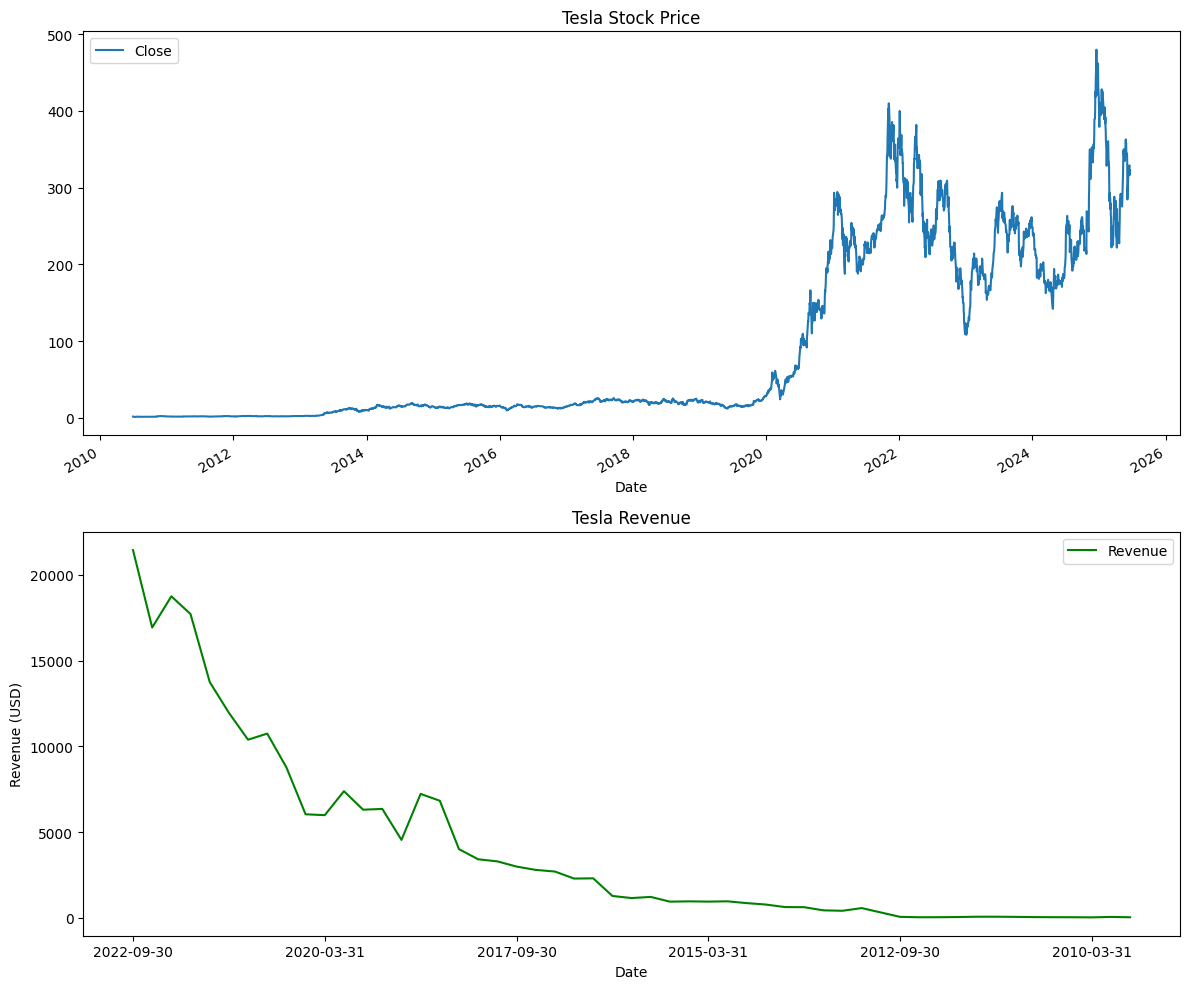

In [9]:
import matplotlib.pyplot as plt

# Convert Revenue to numeric (fixes TypeError)
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors='coerce')

# Tesla Dashboard (Question 5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
tesla_data.plot(x="Date", y="Close", ax=ax1, title="Tesla Stock Price")
tesla_revenue.plot(x="Date", y="Revenue", ax=ax2, title="Tesla Revenue", color='green')
ax2.set_ylabel("Revenue (USD)")
plt.tight_layout()
plt.show()

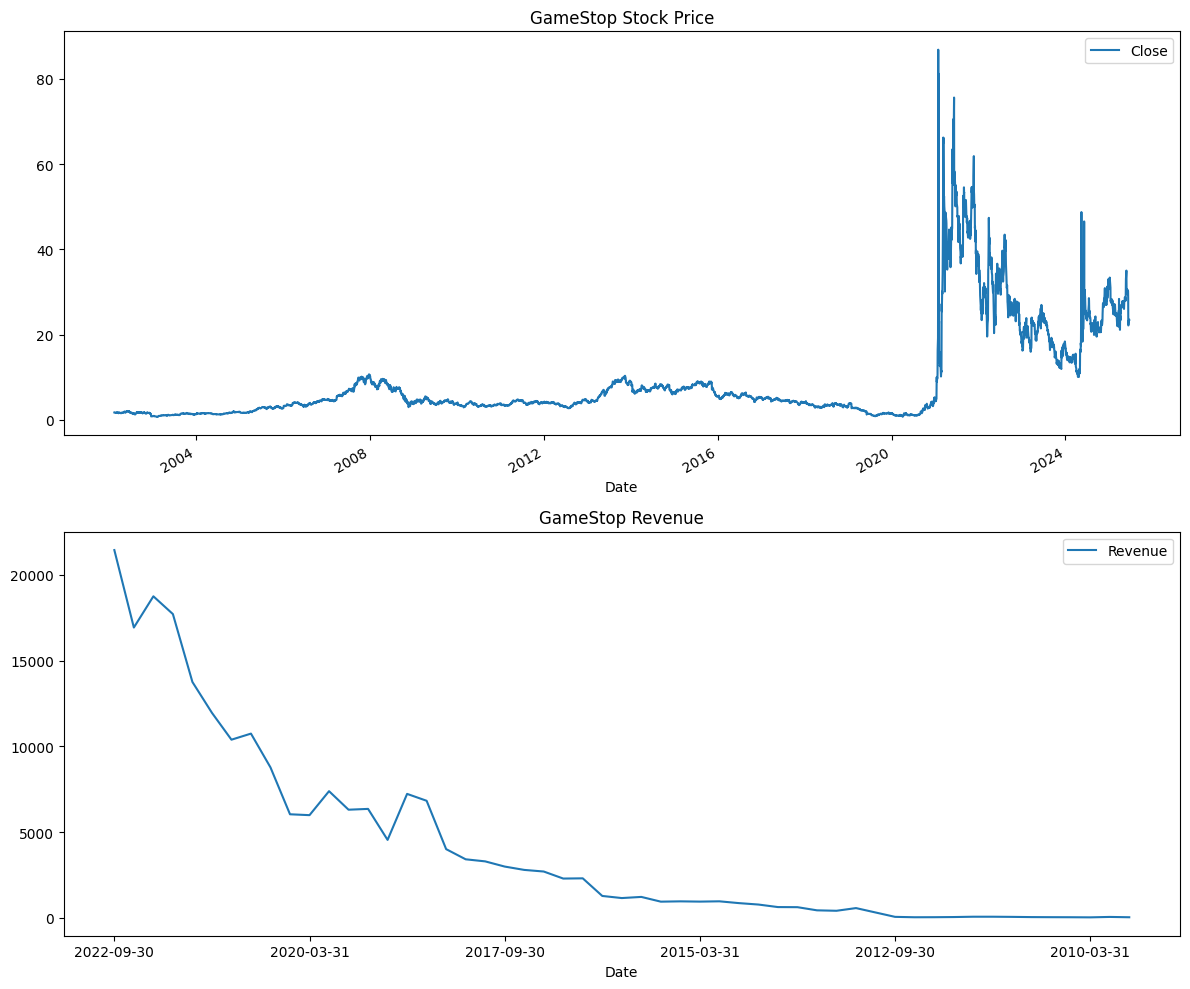

In [10]:
# GameStop Dashboard
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
gamestop_data.plot(x="Date", y="Close", ax=ax1, title="GameStop Stock Price")
gamestop_revenue.plot(x="Date", y="Revenue", ax=ax2, title="GameStop Revenue")
plt.tight_layout()
plt.show()